Thursday 27-April Project Brief: Visualizing streaming data with Streamlit
streamlit

Introduction
In this project, you will create a real-time data visualization dashboard using Streamlit to analyze streaming data from Reddit to identify fraud in telecommunications. The project will involve connecting to Reddit's API, collecting real-time posts, processing the posts to extract useful information, and visualizing the data using Streamlit.

Problem Statement
Fraud in telecommunications is a significant problem that costs the industry billions of dollars annually. Fraudsters use various techniques to exploit telecom infrastructure weaknesses, including hacking into phone systems, stealing identities, and exploiting vulnerabilities in billing systems. The challenge for telecom companies is to detect and prevent fraud in real-time before it causes significant financial damage.

Your task is to develop a real-time data visualization dashboard that monitors Reddit for mentions of telecoms fraud and other related keywords, such as "telecoms scam", "phone fraud", "billing fraud", and "identity theft". You will extract useful information from the posts, such as the post text, user name, subreddit, and date/time, and use this information to analyze the data for patterns and trends related to telecom fraud.

Project Requirements
● Connect to Reddit's API and collect real-time posts related to telecom fraud and other related keywords.
● Process the posts to extract useful information, including the post text, user name, subreddit, and date/time.
● Analyze the data to identify patterns and trends related to telecom fraud and other related keywords.
● Use Streamlit to create an interactive data visualization dashboard that displays real-time information about telecom fraud and other related keywords.
● The dashboard should include at least one chart or graph that displays the data meaningfully, e.g., a bar chart showing the number of fraud mentions by subreddit or a line chart showing the frequency of fraud mentions over time.
● The dashboard should be easy to use and visually appealing, with clear and concise labels and instructions
Deliverables
● Python script to collect and process real-time posts from Reddit API.
● Interactive data visualization dashboard created using Streamlit.
● Deployment of the dashboard to a cloud-based platform.
Steps to access the dashboard
The application code is in file - streamlit_app.py
The libraries that need to be imported to run the dashboard are in file - requirements.txt

In [4]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 7.8 MB/s eta 0:00:00


In [6]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=b6a713a31fd5bc22030de4c826bfa435ed68af149fd32b38cfed075b7f7c8206
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


2023-05-18 05:42:01.690 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



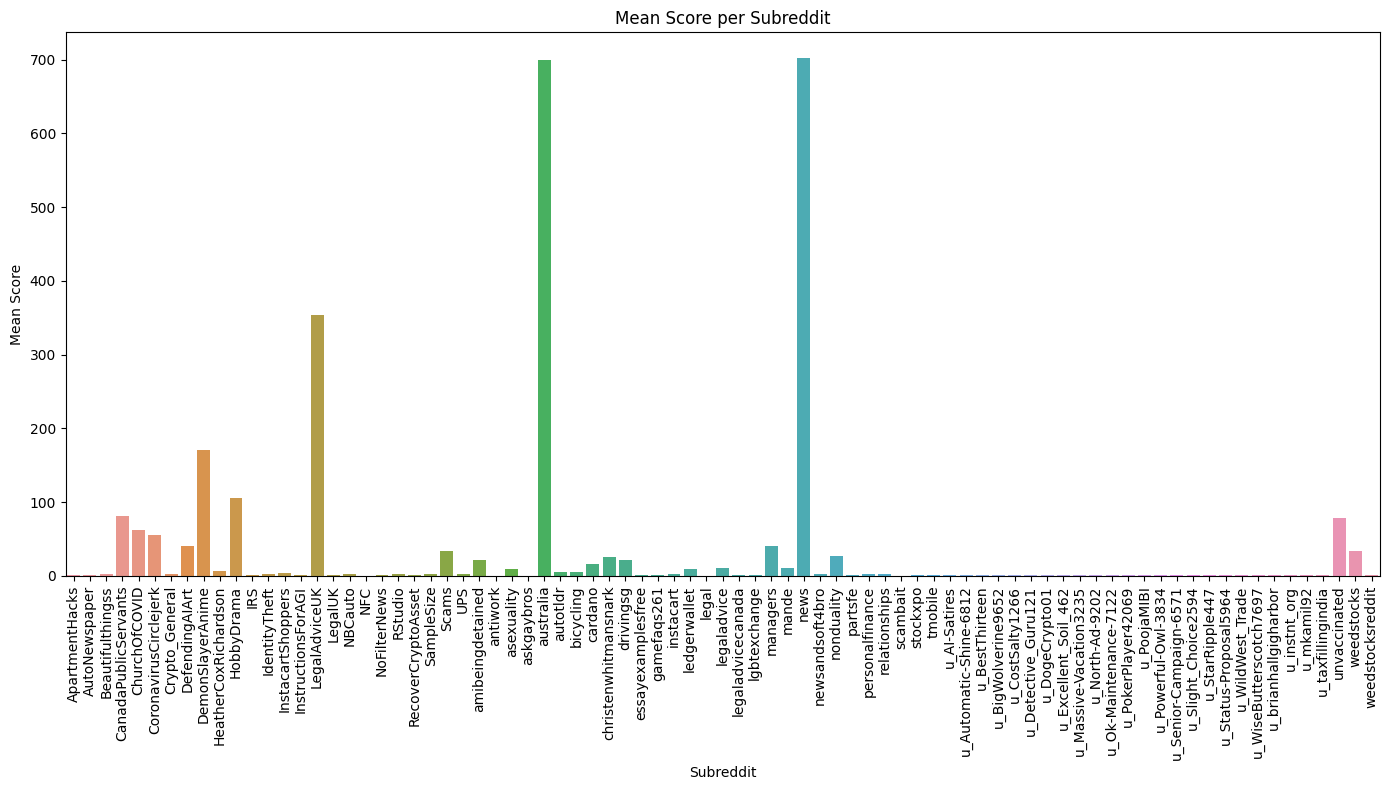

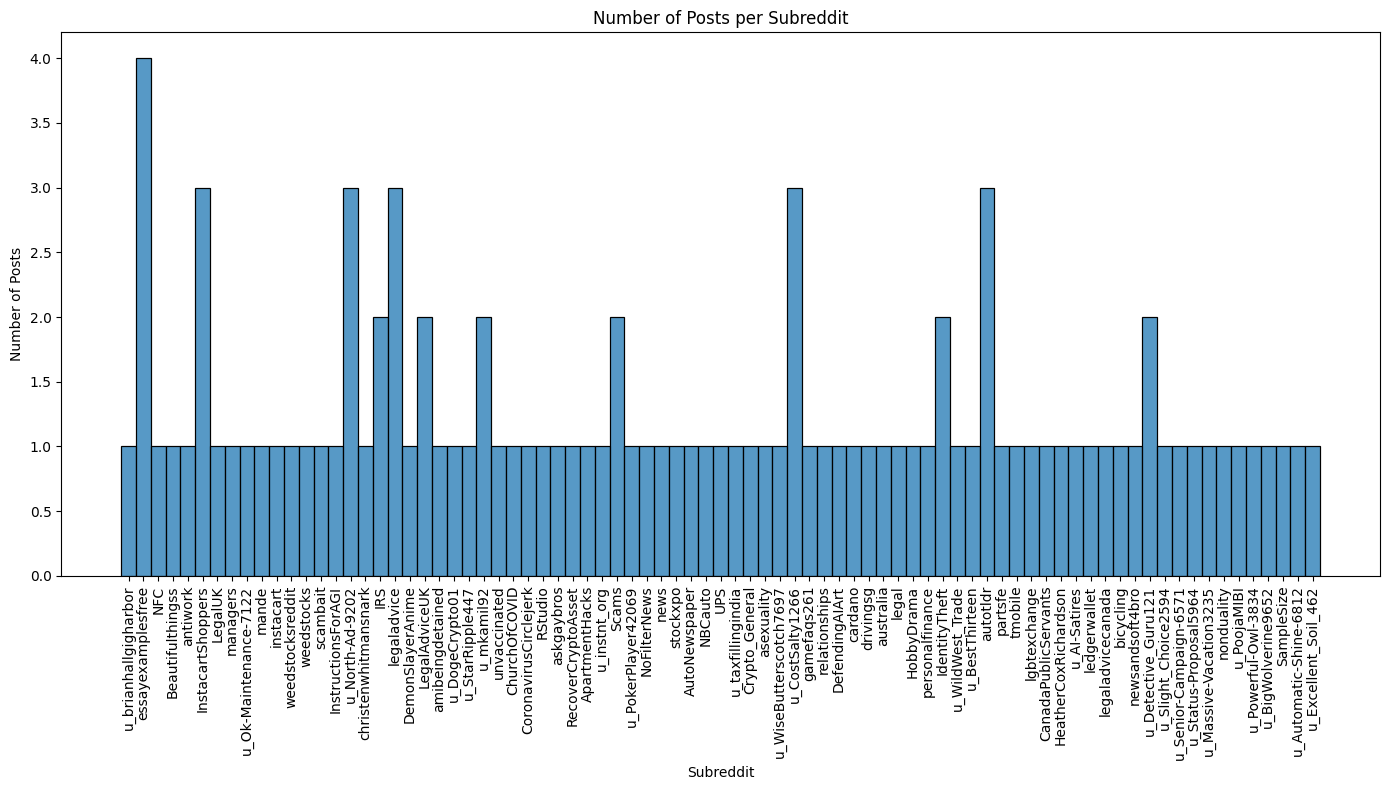

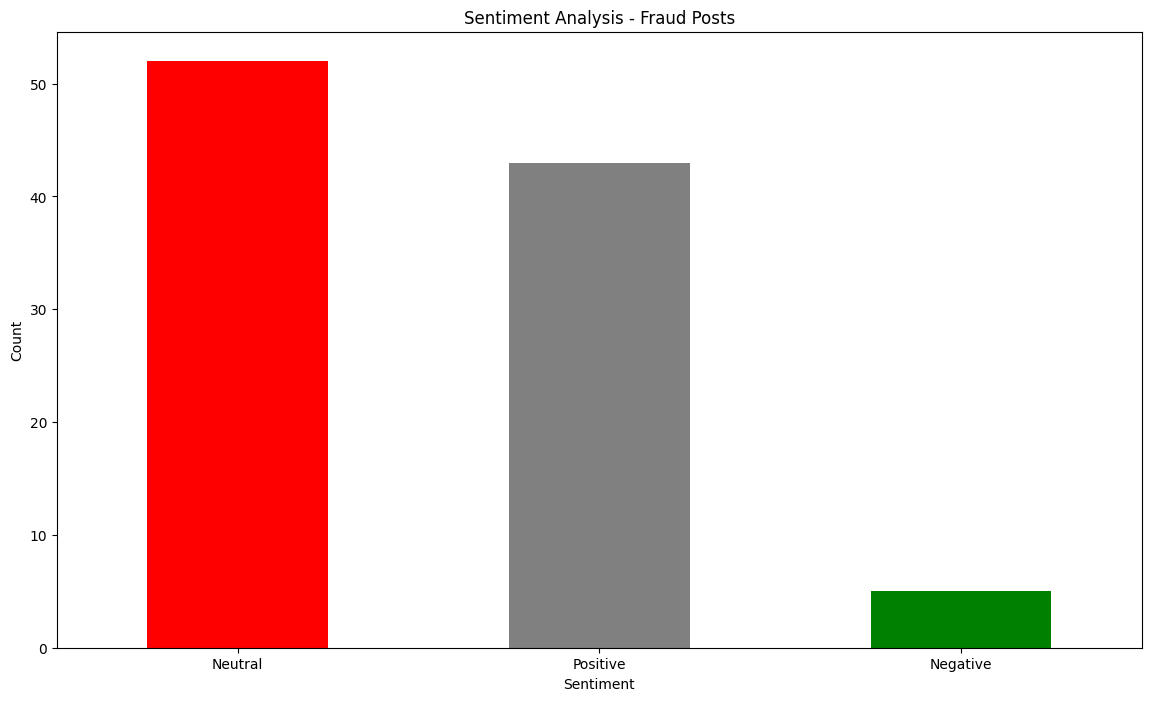

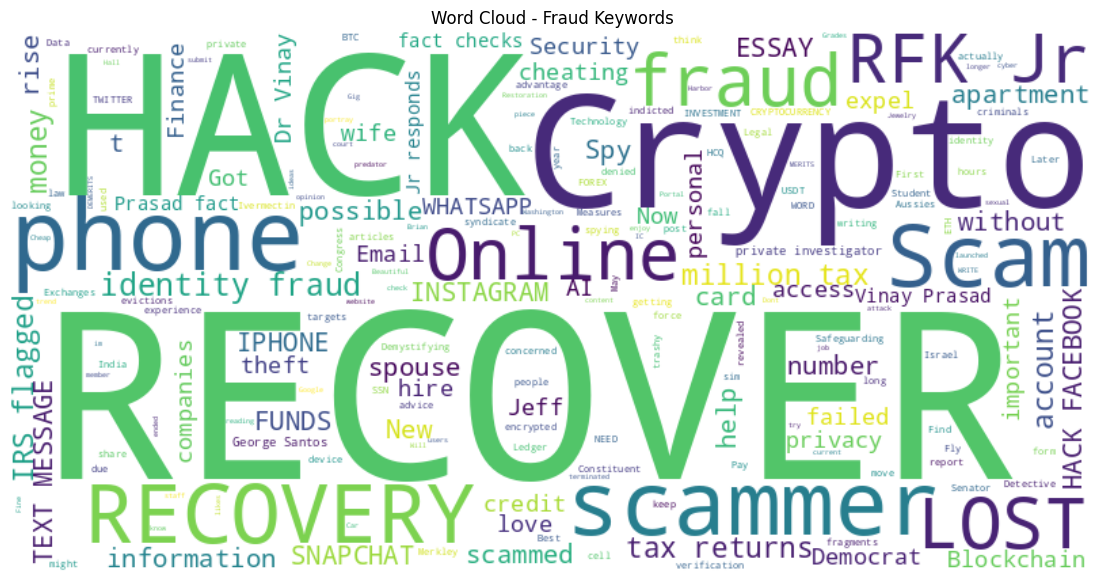

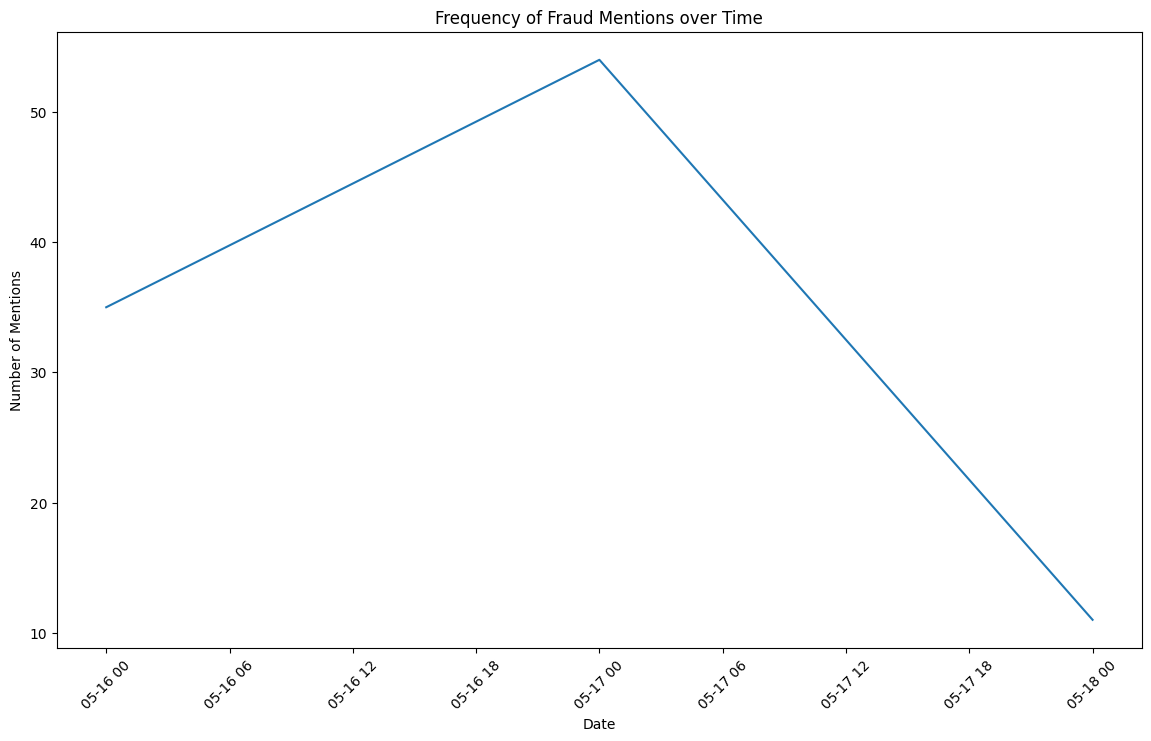

In [7]:
#  Project - Visualizing data with streamlit

import praw
from datetime import datetime, timedelta
from praw.models import Submission

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from wordcloud import WordCloud
import streamlit as st




# Reddit API credentials
client_id = '4P3XofOI1xtQ_mQQ-NKqdA'
client_secret = 'Zydw7_cOkfXrfg104AxEXf0HIXobKw'
user_agent = 'kibz_app'




# Connect to Reddit API
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent,
)



# Load the icon image
icon_image = 'https://www.freeiconspng.com/thumbs/reddit-icon/red-reddit-icon-7.png'
# Insert the icon image above the sidebar text
st.sidebar.image(icon_image, use_column_width=True)

# Create sidebar element for subreddit selection
selected_subreddits = st.sidebar.text_input('Enter Subreddits (comma-separated)', 'all')

# Convert the comma-separated input into a list of subreddit values
subreddits = [sub.strip() for sub in selected_subreddits.split(',')]

# If no subreddits are selected, default to 'all'
if not subreddits:
    subreddits = ['all']



# Create sidebar elements
default_keywords = ['telecom fraud','telecoms scam', 'phone fraud', 'billing fraud', 'identity theft', 'sim fraud', 'digital crime', 'identity theft']

custom_keywords = st.sidebar.text_input('Enter Custom Keywords (separated by comma)', '').split(',')
keywords = st.sidebar.multiselect('Select Keywords', default_keywords + custom_keywords, default=default_keywords)
dayz = st.sidebar.slider('Select Time Delta (in days)', 1, 50, 10,1)



#Load page header intro at the top
st.title('Visual reddit-ing with Streamlit')
st.markdown("<h3 style='color:blue;'>How to use the dashboard </h3>", unsafe_allow_html=True)
st.markdown('On the left sidebar there are several widgets that can be used to modify reddit chart analysis below')
st.markdown('1_ "<b>Enter Subreddits(comma separated)</b>" - Enter a list of subreddits to search in separated by commas. Default is \
"all" subreddits.', unsafe_allow_html=True)
st.markdown('2_ "<b>Enter Custom Keywords(separated by comma)</b>" - Enter list of keywords to search for in all the subreddits listed in [1_]. On pressing enter the keywords are \
added to the listbox below [3_] from where multiples can be selected', unsafe_allow_html=True)
st.markdown('3_ "<b>Select Keywords</b>" - Select desired keywords from the listbox to add them to the subreddit search string',unsafe_allow_html=True)
st.markdown('4_ "<b>Select Time Delta(in days)</b>" - Use the slider to determine how many days back in time to search the subreddits specified in [1_]. Default is 10 days ',unsafe_allow_html=True)



#Load CSS for use in display of charts
st.markdown(
    """
    <style>
    /* Add spacing between charts */
    .chart-container {
        margin-bottom: 20px;
    }
    /* Increase chart title font size */
    .chart-title {
        font-size: 24px;
    }
    </style>
    """,
    unsafe_allow_html=True
)


#Fetch the data from reddit ...
# Initialize a list to store the data
data = []

# Search for posts matching multiple keywords in the specified time delta
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    for submission in subreddit.search(query=' '.join(keywords), sort='new', time_filter='week'):
        # Filter posts from the specified time delta
        if datetime.fromtimestamp(submission.created_utc) > datetime.now() - timedelta(days=dayz):

            post_data = {
                'Title': submission.title,
                'Author': submission.author.name,
                'Subreddit': submission.subreddit.display_name,
                'Date/Time': datetime.fromtimestamp(submission.created_utc),
                'Post Text': submission.selftext,
                'Score': submission.score,
                'URL': submission.url
            }
            data.append(post_data)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Print the DataFrame
#len(df)


#Load the bar plot of mean scores 
if not df.empty:

    mean_scores = df.groupby('Subreddit')['Score'].mean()
    num_posts = df['Subreddit'].value_counts()

    fig,ax = plt.subplots(figsize=(14, 8))
    sns.barplot(x=mean_scores.index, y=mean_scores.values)
    plt.xticks(rotation=90)
    plt.xlabel('Subreddit')
    plt.ylabel('Mean Score')
    plt.title('Mean Score per Subreddit')
    plt.tight_layout()
    #plt.show()
    st.subheader("Reddit chart analytics")

    st.markdown('<div class="chart-container">', unsafe_allow_html=True)
    st.markdown('<h2 class="chart-title">Mean Scores</h2>', unsafe_allow_html=True)
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)



else:
    st.write("No posts found matching the search criteria.")


#Load histogram of number of posts per subreddit

if not df.empty:

    fig,ax = plt.subplots(figsize=(14, 8))
    sns.histplot(data=df, x='Subreddit', binwidth=1)
    plt.xticks(rotation=90)
    plt.xlabel('Subreddit')
    plt.ylabel('Number of Posts')
    plt.title('Number of Posts per Subreddit')
    plt.tight_layout()
    #plt.show()
    st.markdown('<div class="chart-container">', unsafe_allow_html=True)
    st.markdown('<h2 class="chart-title">Posts per subreddit</h2>', unsafe_allow_html=True)
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

else:
    st.write("No posts found matching the search criteria.")



#Using TextBlob carry out sentiment analysis
#Then plot the distribution of sentiments

if not df.empty:
    
    # Perform sentiment analysis on each post text
    df['sentiment'] = df['Post Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    # Categorize sentiments as positive, negative, or neutral
    df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-np.inf, -0.1, 0.1, np.inf], labels=['Negative', 'Neutral', 'Positive'])
    # Calculate the count of each sentiment category
    sentiment_counts = df['sentiment_category'].value_counts()


    #left_column.pyplot(sns.barplot(x=mean_scores.index, y=mean_scores.values))
    fig,ax =plt.subplots(figsize=(14, 8))
    sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
    plt.title('Sentiment Analysis - Fraud Posts')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    #plt.show()
    st.markdown('<div class="chart-container">', unsafe_allow_html=True)
    st.markdown('<h2 class="chart-title">Sentiment Analysis</h2>', unsafe_allow_html=True)
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

else:
    st.write("No posts found matching the search criteria.")


# Concatenate the post titles or text into a single string
# Plot the WORD cloud

if not df.empty:
    
    text = ' '.join(df['Title'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    fig,ax = plt.subplots(figsize=(14, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Fraud Keywords')
    #plt.show()
    st.markdown('<div class="chart-container">', unsafe_allow_html=True)
    st.markdown('<h2 class="chart-title">WORD cloud</h2>', unsafe_allow_html=True)
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

else:
    st.write("No posts found matching the search criteria.")



# Convert the 'created_utc' column to datetime
# Plot the frequency of fraud mentions over time on a line chart

if not df.empty:
    
    df['Convert_UTC'] = pd.to_datetime(df['Date/Time'], unit='s')
    # Group the data by date and count the number of mentions
    mention_counts = df['Convert_UTC'].dt.date.value_counts().sort_index()

    fig,ax = plt.subplots(figsize=(14, 8))
    mention_counts.plot(kind='line')
    plt.title('Frequency of Fraud Mentions over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=45)
    #plt.show()
    st.markdown('<div class="chart-container">', unsafe_allow_html=True)
    st.markdown('<h2 class="chart-title">Line chart of fraud mentions</h2>', unsafe_allow_html=True)
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

else:
    st.write("No posts found matching the search criteria.")



# Display raw data fetched from reddit in a compact table
if not df.empty:
    st.subheader('Reddit Feed Summary')
    st.table(df[['Title', 'Author', 'Subreddit', 'Date/Time', 'URL']])

else:
    st.write("No posts found matching the search criteria.")

